Olympic Games Exploration: 🏅

Practice Exercise: Exploring data (Exploratory Data Analysis)

Context:
• The data includes 120 years (1896 to 2016) of Olympic games with information about athletes and medal results.
• We'll focus on practicing the summary statistics and data visualization techniques that we've learned in the course.
⚫ In general, this dataset is popular to explore how the Olympics have evolved over time, including the participation and performance of different genders, different countries, in various sports and events.
⚫ Check out the original source if you are interested in using this data for other purposes (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes- and-results)
Dataset Description:
We'll work on the data within athlete_events.csv.
Each row corresponds to an individual athlete competing in an individual Olympic event.
The columns are:
• ID: Unique number for each athlete
⚫ Name: Athlete's name
• Sex: M or F
• Age: Integer
⚫ Height: In centimeters
• Weight: In kilograms
• Team: Team name
• NOC: National Olympic Committee 3-letter code
• Games: Year and season
• Year: Integer
• Season: Summer or Winter
• City: Host city
• Sport: Sport
• Event: Event
• Medal: Gold, Silver, Bronze, or NA

Objective:
• Examine/clean the dataset
• Explore distributions of single numerical and categorical features via statistics and plots
• Explore relationships of multiple features via statistics and plots
We are only going to explore part of the dataset, please feel free to explore more if you are interested.
1. Import the libraries Pandas and Seaborn
2. Import the data from the csv file as DataFrame olympics
3. Look at the info summary, head of the DataFrame
4. Impute the missing data
Use Iterative Imputer in sklearn to impute based on columns Year, Age, Height, Weight


1. Import the libraries Pandas and Seaborn

In [2]:
import pandas as pd 
import seaborn as sns 

2. Import the data from the csv file as DataFrame olympics

In [3]:
olympics = pd.read_csv("./dataset/athlete_events.csv")
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


3. Look at the info summary, head of the DataFrame

In [4]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


4. Impute the missing data

Use IterativeImputer in sklearn to impute based on columns Year, Age, Height, Weight

In [5]:
olympics[['Year','Age','Height','Weight']].isna().sum()

Year          0
Age        9474
Height    60171
Weight    62875
dtype: int64

Import libraries

In [6]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer 


Build a list of columns that will be used for imputation, which are Year, Age, Height, Weight
The column Year doesn't have mssing values, but we include it since it might be helpful modeling the other three columns. The age, height, and weight could change across years.

In [7]:
columns_to_impute = ['Year', 'Age', 'Height', 'Weight']

Create an Iterative Imputer object and set its min_value and max_value parameters to be the minumum and maximum of corresponding columns

Apply the imputer to fit and transform the columns to an imputed NumPy array
Assign the imputed array back to the original DataFrame's columns


In [8]:
imter_imp = IterativeImputer(min_value=olympics[columns_to_impute].min(),max_value=olympics[columns_to_impute].max())

imputed_num = imter_imp.fit_transform(olympics[columns_to_impute])

olympics[columns_to_impute] = imputed_num

Fill the missing values in the column Medal with string of 'NA'

In [9]:
olympics['Medal'].isna().sum()

231333

In [10]:
olympics['Medal'].fillna("NA",  inplace=True)

In [11]:
# now  we have 0 null values
olympics['Medal'].isna().sum()

0

Double check that the columns are all imputed

In [12]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
2,3,Gunnar Nielsen Aaby,M,24.0,173.815507,70.022253,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NA
3,4,Edgar Lindenau Aabye,M,34.0,175.833593,75.252830,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA


In [13]:
olympics.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

5. Use the describe method to check the numerical columns

In [14]:
numeric_col = olympics.select_dtypes(include='number').columns
olympics[numeric_col].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.000000,102097.25,135571.0
Age,271116.0,25.600403,6.286884,10.0,22.0,25.000000,28.00,97.0
Height,271116.0,175.280009,9.348504,127.0,170.0,174.985438,180.00,226.0
Weight,271116.0,70.952869,12.804718,25.0,63.0,70.064758,77.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.000000,2002.00,2016.0


6. Plot the histograms of the numerical columns using Pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C17046C130>,
      dtype=object)

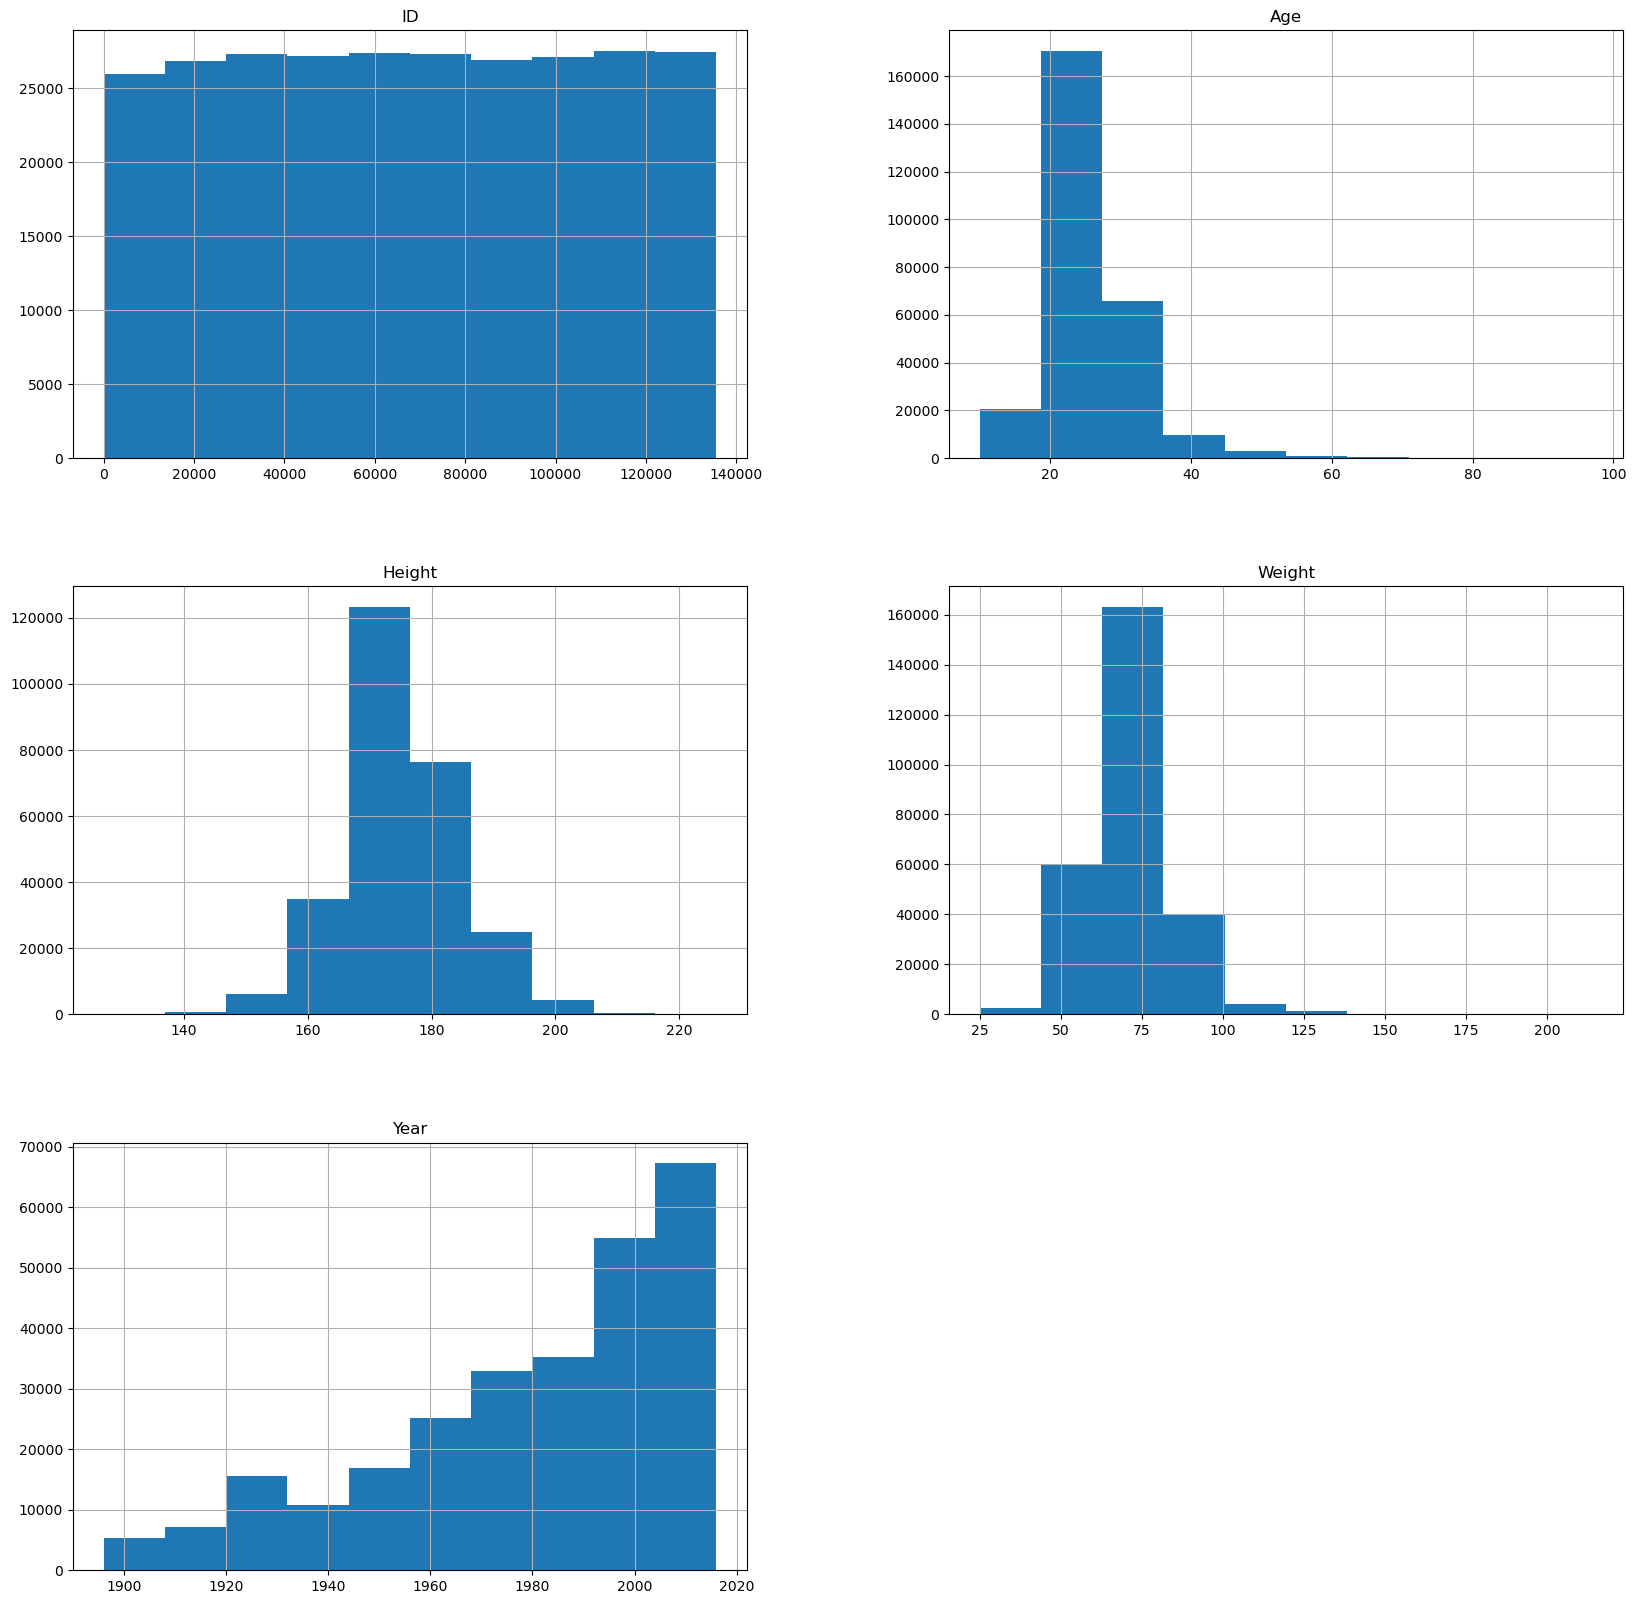

In [15]:
olympics[numeric_col].hist(figsize=(20,20))

7. Plot the histogram with a rug plot of the column Age using Seaborn, with both 20 and 50 bins

In [16]:
olympics['Age'].astype(int)

0         24
1         23
2         24
3         34
4         21
          ..
271111    29
271112    27
271113    27
271114    30
271115    34
Name: Age, Length: 271116, dtype: int32

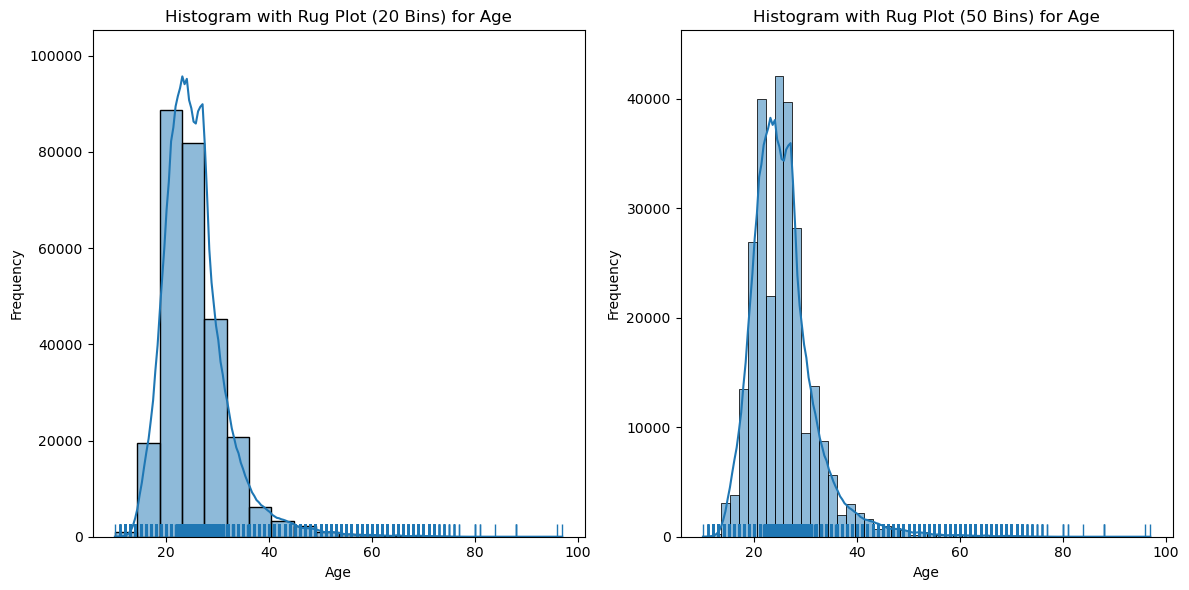

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df = olympics.copy()
# Assuming 'df' is your DataFrame with an 'Age' column
plt.figure(figsize=(12, 6))

# Create a histogram with 20 bins and a rug plot
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=20, kde=True)
sns.rugplot(data=df, x='Age')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram with Rug Plot (20 Bins) for Age')

# Create a histogram with 50 bins and a rug plot
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Age', bins=50, kde=True)
sns.rugplot(data=df, x='Age')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram with Rug Plot (50 Bins) for Age')

plt.tight_layout()
plt.show()



8. Plot the boxplot of the column Age using Pandas

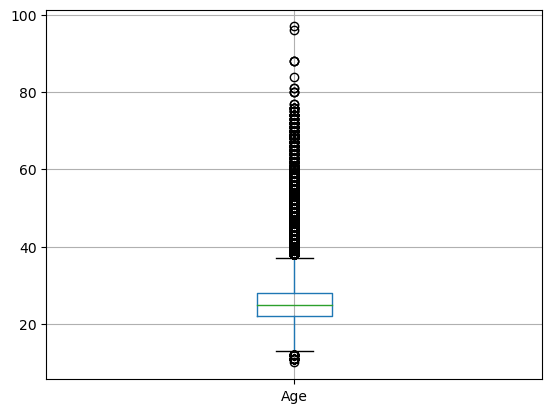

In [18]:
olympics.boxplot(column='Age')

9. Plot the boxplot of the column Age using Seaborn

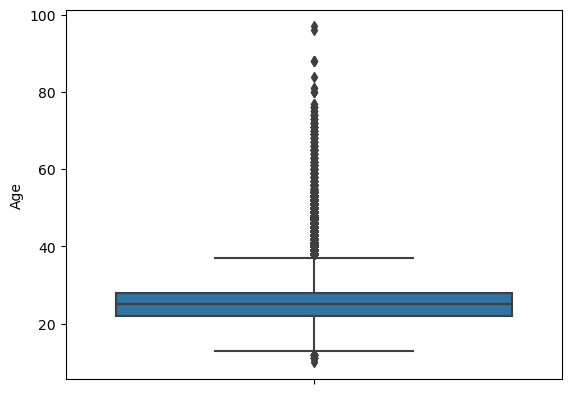

In [19]:
sns.boxplot(data=olympics,y='Age')

10. Calculate the first quartile, third quartile, and IQR of the column Age

In [20]:
q1 = olympics['Age'].quantile(0.25)
q3 = olympics['Age'].quantile(0.75)
iqr = q3-q1


print(f" q1: {q1}\n q3: {q3} \n iqr: {iqr}")


 q1: 22.0
 q3: 28.0 
 iqr: 6.0


11. Print out the lower and upper thresholds for outliers based on IQR for the column Age

In [21]:
lower_bond = q1-(1.5*iqr )
upper_bond = q3+(1.5*iqr)
print(f"lower fence {lower_bond}\nupper fence {upper_bond}")

lower fence 13.0
upper fence 37.0


12. What are the Sport for the athletes of really young age
Filter for the column Sport when the column Age has outliers of lower values

In [22]:
yougest_athletes = olympics['Age']<lower_bond

yougest_athletes_df = olympics[yougest_athletes].sort_values(by='Age')
yougest_athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,170.026263,62.620508,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896.0,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze
237141,118925,Megan Olwen Devenish Taylor (-Mandeville-Ellis),F,11.0,157.000000,48.327015,Great Britain,GBR,1932 Winter,1932.0,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NA
94058,47618,"Sonja Henie (-Topping, -Gardiner, -Onstad)",F,11.0,155.000000,45.000000,Norway,NOR,1924 Winter,1924.0,Winter,Chamonix,Figure Skating,Figure Skating Women's Singles,NA
140650,70616,Liu Luyang,F,11.0,171.970551,63.286262,China,CHN,1988 Winter,1988.0,Winter,Calgary,Figure Skating,Figure Skating Mixed Ice Dancing,NA
79024,40129,Luigina Giavotti,F,11.0,170.858330,63.195179,Italy,ITA,1928 Summer,1928.0,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver


Look at the unique values of Sport and their counts when Age are low-valued outliers
Did you find any sports popular for really young athletes?

In [23]:
yougest_athletes_df['Sport'].value_counts()

# Swimming seems to be popular

Swimming          25
Figure Skating    15
Gymnastics         5
Rowing             5
Athletics          2
Diving             1
Name: Sport, dtype: int64

13. What are the Sport for the athletes of older age
Filter for the column Sport when the column Age has outliers of higher values

In [24]:
oldest_athletes = olympics['Age']> upper_bond

oldest_athletes_df = olympics[oldest_athletes].sort_values(by='Age',ascending=False)
oldest_athletes_df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,191.402230,108.439241,United States,USA,1928 Summer,1928.0,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NA
98118,49663,Winslow Homer,M,96.0,191.237496,107.919219,United States,USA,1932 Summer,1932.0,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NA
60863,31173,Thomas Cowperthwait Eakins,M,88.0,189.326435,103.710469,United States,USA,1932 Summer,1932.0,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NA
60862,31173,Thomas Cowperthwait Eakins,M,88.0,189.326435,103.710469,United States,USA,1932 Summer,1932.0,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NA
60861,31173,Thomas Cowperthwait Eakins,M,88.0,189.326435,103.710469,United States,USA,1932 Summer,1932.0,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NA


Look at the unique values of Sport and their counts when Age are high-valued outliers Did you find any sports popular for older age athletes?

In [25]:
oldest_athletes_df['Sport'].value_counts()
# shooting seems to be more popular amoung the oldest aged athletes

Shooting                 3178
Art Competitions         2226
Equestrianism            1997
Sailing                  1040
Fencing                  1031
Athletics                 408
Archery                   311
Bobsleigh                 230
Gymnastics                167
Rowing                    122
Cycling                    99
Curling                    98
Table Tennis               83
Cross Country Skiing       81
Biathlon                   78
Canoeing                   71
Tennis                     70
Ice Hockey                 51
Wrestling                  46
Golf                       42
Weightlifting              42
Speed Skating              36
Polo                       33
Figure Skating             30
Hockey                     29
Handball                   29
Water Polo                 29
Luge                       26
Alpine Skiing              25
Skeleton                   23
Beach Volleyball           16
Volleyball                 15
Tug-Of-War                 15
Judo      

14. Check for the number of unique values in each column

In [26]:
olympics.nunique()
            #  or 
# for col in olympics.columns :
#     val = olympics[col].nunique()
#     print(f"{col} : {val}")

ID        135571
Name      134732
Sex            2
Age          785
Height      2475
Weight      3565
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          4
dtype: int64

15. Use the describe method to check the non-numerical columns

In [27]:
cat_cols = olympics.select_dtypes(exclude='number').columns

olympics[cat_cols].describe().T

,count,unique,top,freq
Name,271116,134732,Robert Tait McKenzie,58
Sex,271116,2,M,196594
Team,271116,1184,United States,17847
NOC,271116,230,USA,18853
Games,271116,51,2000 Summer,13821
Season,271116,2,Summer,222552
City,271116,42,London,22426
Sport,271116,66,Athletics,38624
Event,271116,765,Football Men's Football,5733
Medal,271116,4,NA,231333


16. Apply the value_counts method for each non-numerical column, check for their unique values and counts

In [28]:
for col in cat_cols:
    unique_count = olympics[col].nunique()
    total_count = olympics[col].count()
    print(f"{col} (Unique: {unique_count}, Total: {total_count})")
    print(olympics[col].value_counts())
    print()


Name (Unique: 134732, Total: 271116)
Robert Tait McKenzie            58
Heikki Ilmari Savolainen        39
Joseph "Josy" Stoffel           38
Ioannis Theofilakis             36
Takashi Ono                     33
                                ..
Tatyana Vasilyevna Kalmykova     1
Mariya Lvovna Kalmykova          1
Christine Kalmer                 1
Joannis "Jannis" Kalmazidis      1
Pierre-Georges LeClercq          1
Name: Name, Length: 134732, dtype: int64

Sex (Unique: 2, Total: 271116)
M    196594
F     74522
Name: Sex, dtype: int64

Team (Unique: 1184, Total: 271116)
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: Team, Length: 1184, dtype: int64

NOC (Unique: 230, Total: 271116)
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD 

17. Check the first record within the dataset for each Olympic Sport
Hint: sort the DataFrame by Year, then groupby by Sport


In [29]:
# Sort the DataFrame by 'Year'
olympics_sorted = olympics.sort_values(by='Year', ascending=True)

# Group by 'Sport' and get the first record for each group
first_records_by_sport = olympics_sorted.groupby('Sport').first()

# Display the first record for each Olympic Sport
first_records_by_sport



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
Sport,,,,,,,,,,,,,,
Aeronautics,107506,Hermann Schreiber,M,26.000000,174.589865,71.098729,Switzerland,SUI,1936 Summer,1936.0,Summer,Berlin,Aeronautics Mixed Aeronautics,Gold
Alpine Skiing,32818,Reat Erce,M,17.000000,172.439922,66.363886,Turkey,TUR,1936 Winter,1936.0,Winter,Garmisch-Partenkirchen,Alpine Skiing Men's Combined,NA
Alpinism,74134,George Herbert Leigh Mallory,M,37.000000,176.995129,76.867544,Great Britain,GBR,1924 Winter,1924.0,Winter,Chamonix,Alpinism Mixed Alpinism,Gold
Archery,67722,Lecomte,M,27.618563,174.310796,71.897322,France,FRA,1900 Summer,1900.0,Summer,Paris,"Archery Men's Au Cordon Dore, 50 metres",NA
Art Competitions,48741,Konrad Hippenmeier,M,31.000000,175.339389,73.692765,Switzerland,SUI,1912 Summer,1912.0,Summer,Stockholm,Art Competitions Mixed Architecture,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tug-Of-War,86368,August Nilsson,M,27.000000,174.161415,71.570173,Denmark/Sweden,SWE,1900 Summer,1900.0,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold
Volleyball,14306,Georgi Spasov Boyadzhiev,M,21.000000,177.000000,76.000000,Bulgaria,BUL,1964 Summer,1964.0,Summer,Tokyo,Volleyball Men's Volleyball,NA
Water Polo,74733,Auguste Jean Baptiste Louis Joseph Marc,M,19.000000,172.250355,67.361423,Pupilles de Neptune de Lille #2-1,FRA,1900 Summer,1900.0,Summer,Paris,Water Polo Men's Water Polo,Bronze


18. What are the average Age, Height, Weight of female versus male Olympic athletes

In [30]:
olympics.groupby('Sex')[['Age','Height','Weight']].mean()

,Age,Height,Weight
Sex,,,
F,23.748234,168.476034,60.960650
M,26.302496,177.859161,74.740574


19. What are the minimum, average, maximum Age, Height, Weight of athletes in different Year

In [31]:
olympics.groupby('Year')[['Age','Height','Weight']].agg(['min','mean','max'])

Age                  Height                             Weight  \
         min       mean   max    min        mean         max        min   
Year                                                                      
1896.0  10.0  25.364356  40.0  154.0  173.569607  188.000000  45.000000   
1900.0  13.0  28.454101  71.0  153.0  174.664627  191.000000  51.000000   
1904.0  14.0  26.867754  71.0  155.0  174.435046  195.000000  43.000000   
1906.0  13.0  27.272610  54.0  165.0  174.946975  196.000000  52.000000   
1908.0  14.0  27.061116  61.0  157.0  175.059627  201.000000  51.000000   
1912.0  13.0  27.528582  67.0  157.0  175.149494  200.000000  49.000000   
1920.0  13.0  28.861062  72.0  142.0  175.220153  218.770915  33.074491   
1924.0  11.0  28.101622  81.0  142.0  174.980222  218.578230  34.356723   
1928.0  11.0  28.728275  97.0  147.0  175.282553  211.000000  41.000000   
1932.0  11.0  32.002855  96.0  147.0  175.826347  200.000000  40.090648   
1936.0  11.0  27.506104  74.0  147.0  175.155241  205.000000  37.000000   
1948.0  12.0  28.407495  84.0  140.0  175.567741  213.000000  47.000000   
1952.0  12.0  26.165217  65.0  150.0  174.812820  213.000000  42.000000   
1956.0  12.0  25.949715  67.0  137.0  174.607226  218.000000  28.000000   
1960.0  11.0  25.187182  65.0  137.0  173.316035  218.000000  36.000000   
1964.0  12.0  24.948374  60.0  137.0  173.546073  218.000000  38.000000   
1968.0  11.0  24.263374  68.0  127.0  173.959439  216.000000  34.000000   
1972.0  12.0  24.318900  69.0  130.0  174.562405  223.000000  38.000000   
1976.0  12.0  23.850452  70.0  136.0  174.865117  220.000000  30.000000   
1980.0  13.0  23.734613  70.0  131.0  175.508742  220.000000  25.000000   
1984.0  12.0  23.925675  60.0  132.0  175.524970  218.000000  31.000000   
1988.0  11.0  24.085104  70.0  127.0  175.698459  223.000000  32.000000   
1992.0  11.0  24.319680  62.0  136.0  175.959574  226.000000  30.000000   
1994.0  13.0  24.422594  46.0  148.0  175.158296  200.000000  40.000000   
1996.0  12.0  24.915179  63.0  136.0  175.836214  223.000000  30.000000   
1998.0  14.0  25.163160  50.0  142.0  174.589636  200.000000  32.000000   
2000.0  13.0  25.422476  63.0  136.0  176.085713  226.000000  28.000000   
2002.0  15.0  25.916281  48.0  149.0  174.709888  201.000000  42.000000   
2004.0  13.0  25.639515  57.0  139.0  175.971393  226.000000  30.000000   
2006.0  14.0  25.959151  52.0  147.0  174.628393  206.000000  38.000000   
2008.0  12.0  25.733541  67.0  137.0  176.209780  226.000000  28.000000   
2010.0  15.0  26.124262  51.0  149.0  174.918873  206.000000  38.000000   
2012.0  13.0  25.961378  71.0  140.0  176.247158  221.000000  30.071474   
2014.0  15.0  25.987324  55.0  146.0  174.818773  206.000000  38.066881   
2016.0  13.0  26.207919  62.0  133.0  176.024469  218.000000  30.000000   

                          
             mean    max  
Year                      
1896.0  70.982411  106.0  
1900.0  72.502816  102.0  
1904.0  71.715326  115.0  
1906.0  72.309427  114.0  
1908.0  72.484058  115.0  
1912.0  72.354296  125.0  
1920.0  72.791440  146.0  
1924.0  72.217506  146.0  
1928.0  72.568654  125.0  
1932.0  73.867313  110.0  
1936.0  71.960859  138.0  
1948.0  72.408041  125.0  
1952.0  71.097510  145.0  
1956.0  71.041599  141.0  
1960.0  69.480564  141.0  
1964.0  69.759825  163.0  
1968.0  69.609517  163.0  
1972.0  70.003339  182.0  
1976.0  70.000335  163.0  
1980.0  70.624903  190.0  
1984.0  70.257754  150.0  
1988.0  70.443543  161.0  
1992.0  70.862030  176.5  
1994.0  70.972262  113.0  
1996.0  70.818289  176.5  
1998.0  70.898616  123.0  
2000.0  71.106805  180.0  
2002.0  71.164405  123.0  
2004.0  71.284135  198.0  
2006.0  70.512440  127.0  
2008.0  71.375322  214.0  
2010.0  70.733917  116.0  
2012.0  71.173434  214.0  
2014.0  70.572661  116.0  
2016.0  70.966084  170.0

20. What are the minimum, average, median, maximum Age of athletes for different Season and Sex combinations

In [32]:
olympics.groupby(['Season','Sex'])[['Age']].agg(['min','mean','max'])

Age                 
             min       mean   max
Season Sex                       
Summer F    11.0  23.680377  74.0
       M    10.0  26.464649  97.0
Winter F    11.0  24.015736  48.0
       M    12.0  25.512635  58.0

21. What are the average Age of athletes, and numbers of unique Team, Sport, Event, for different Season and Sex combinations

In [33]:
agg_fun = {
    'Age':'mean',
    'Team':'nunique'
}

olympics.groupby(['Season','Sex'])[['Age','Team']].agg(agg_fun)

Age  Team
Season Sex                 
Summer F    23.680377   352
       M    26.464649  1118
Winter F    24.015736   144
       M    25.512635   214

22. What are the average Age, Height, Weight of athletes, for different Medal, Season, Sex combinations

In [34]:
olympics.groupby(['Medal','Season','Sex'])[['Age','Height','Weight']].agg('mean')

Age      Height     Weight
Medal  Season Sex                                  
Bronze Summer F    24.637527  171.110734  63.903325
              M    26.382673  179.283138  76.834194
       Winter F    25.115578  167.339043  61.132946
              M    26.387043  178.831087  77.296962
Gold   Summer F    24.215093  171.594933  64.252235
              M    26.501307  179.803255  77.426878
       Winter F    25.202636  167.563734  62.006768
              M    26.606436  179.569202  78.047604
NA     Summer F    23.547521  168.283937  60.468257
              M    26.454123  177.557129  74.215742
       Winter F    23.855915  167.281733  60.539905
              M    25.386328  177.741840  74.861337
Silver Summer F    24.296089  171.310947  63.903671
              M    26.690500  179.391244  77.017761
       Winter F    25.240527  167.916040  61.921625
              M    26.430566  179.030573  77.429293

23. Plot the scatterplot of Height and Weight

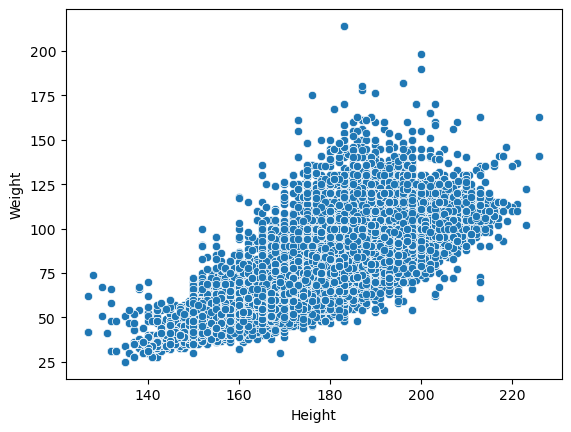

In [35]:
sns.scatterplot(data=olympics,x='Height',y='Weight')

24. Plot the scatterplot of Height and Weight, using different colors and styles of dots for different Sex

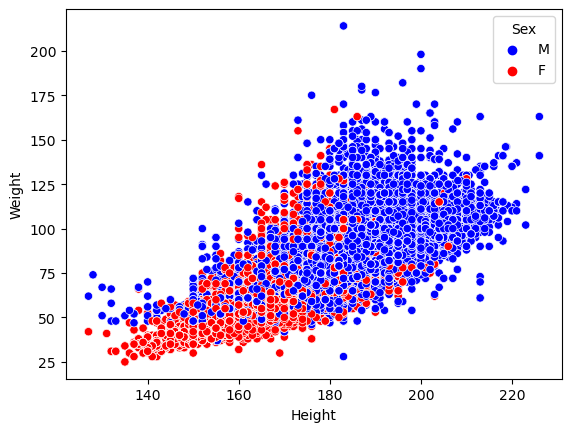

In [36]:
cust_colors = {'M':'blue','F':'red'}
sns.scatterplot(data=olympics,x='Height',y='Weight',hue='Sex',palette=cust_colors)

25. Plot the pairwise relationships of Age, Height, Weight

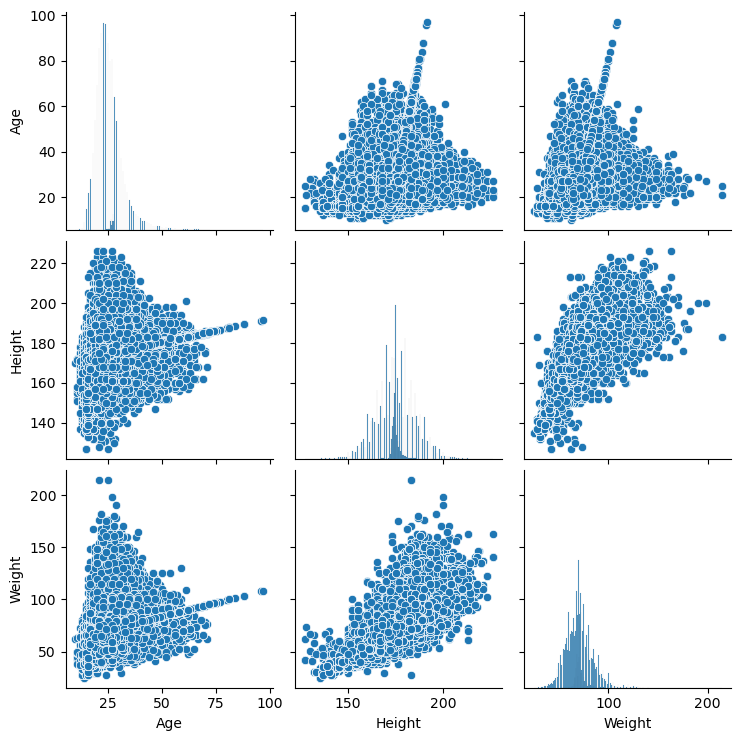

In [37]:
sns.pairplot(data=olympics[['Age','Height','Weight']])

26. Plot the pairwise relationships of Age, Height, Weight, with different colors for Sex

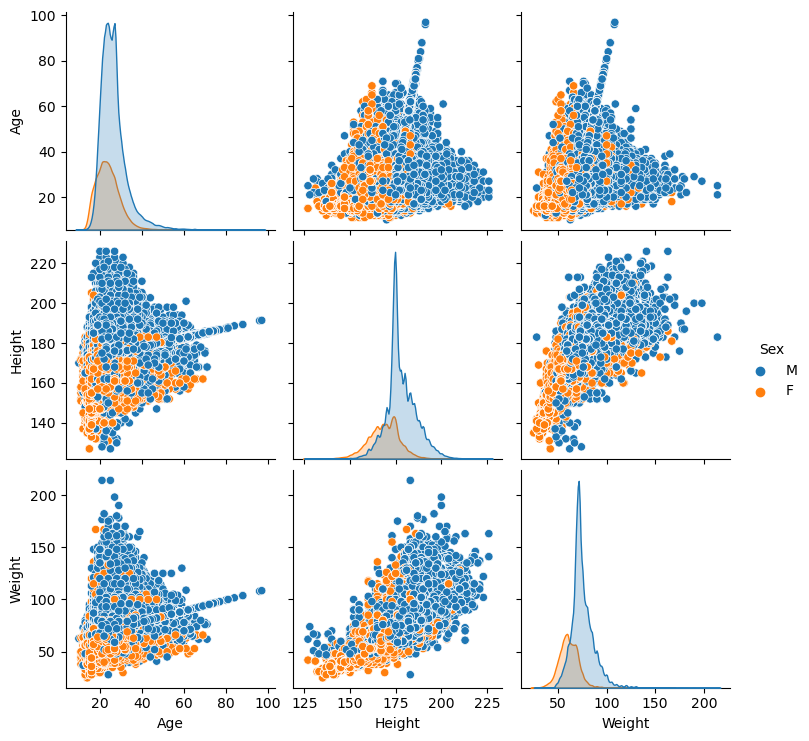

In [38]:
sns.pairplot(data=olympics[['Age', 'Height', 'Weight', 'Sex']], hue='Sex')


27. Print out the correlation matrix of Age, Height, Weight

In [39]:
correlation_matrix = olympics[['Age', 'Height', 'Weight']].corr()
print(correlation_matrix)

             Age    Height    Weight
Age     1.000000  0.161797  0.264409
Height  0.161797  1.000000  0.799258
Weight  0.264409  0.799258  1.000000


28. Use heatmap to demonstrate the correlation matrix of Age, Height, Weight, use a colormap (cmap) of 'crest'

Text(0.5, 1.0, 'Correlation Heatmap')

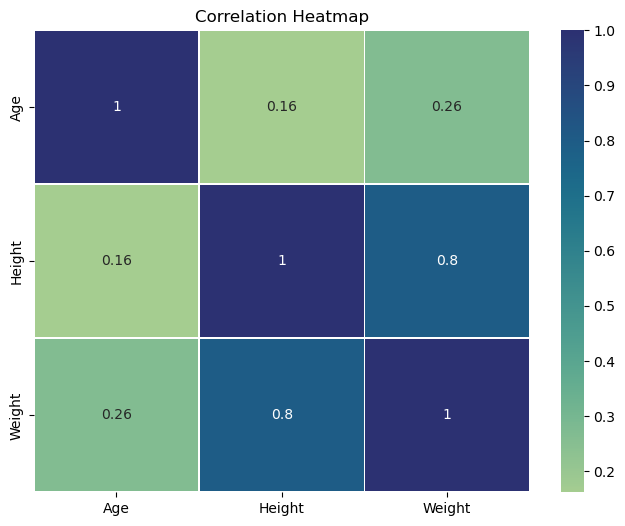

In [40]:
columns_of_interest = ['Age', 'Height', 'Weight']

# Calculate the correlation matrix
correlation_matrix = olympics[columns_of_interest].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=.5)
plt.title('Correlation Heatmap')

29. Plot the histograms of Age, with different colors for different Sex

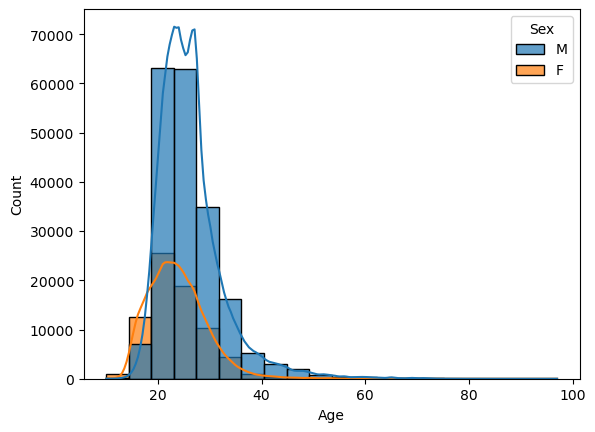

In [41]:
sns.histplot(data=olympics, x='Age', hue='Sex', bins=20, kde=True, alpha=0.7)

30. Plot the histograms of Age, on separate plots for different Sex

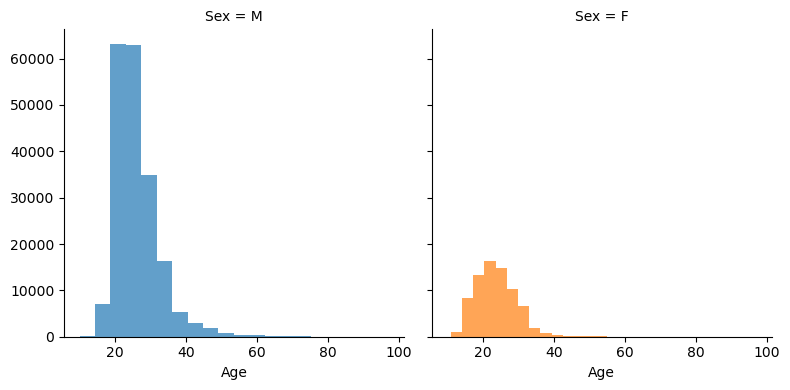

In [43]:
# Create a FacetGrid for separate histograms by Sex
g = sns.FacetGrid(olympics, col="Sex", height=4, aspect=1,hue='Sex')

# Plot histograms for Age in each facet (male and female)
g.map(plt.hist, "Age", bins=20, alpha=0.7)


31. Look at the changes of average Age across Year by line charts, with separate lines for different Season using different colors

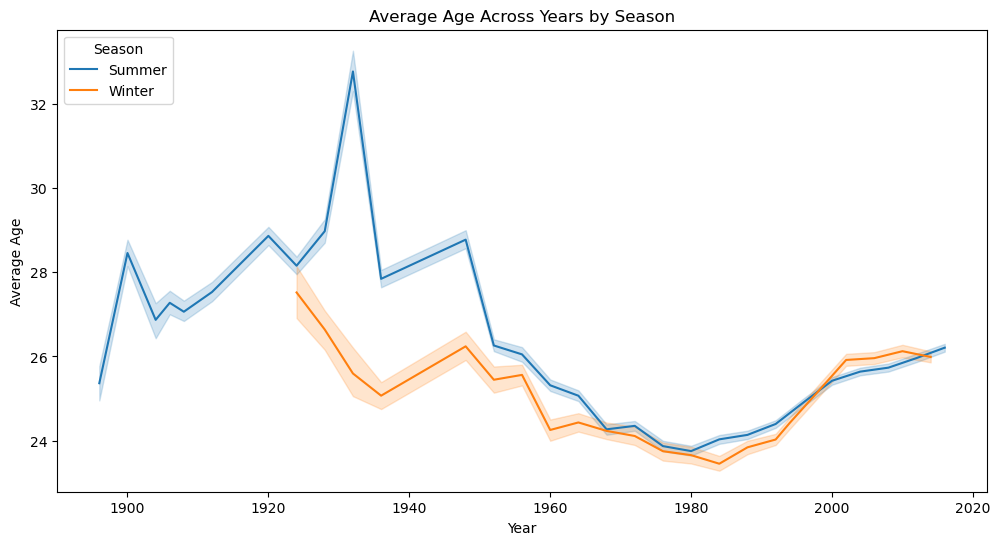

In [44]:
plt.figure(figsize=(12, 6))

# Use Seaborn's lineplot function
sns.lineplot(data=olympics, x='Year', y='Age', hue='Season')

# Set plot labels and title
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.title("Average Age Across Years by Season")

# Show a legend
plt.legend(title='Season', loc='upper left')

32. Look at the distributions of Age for different Sex using boxplots

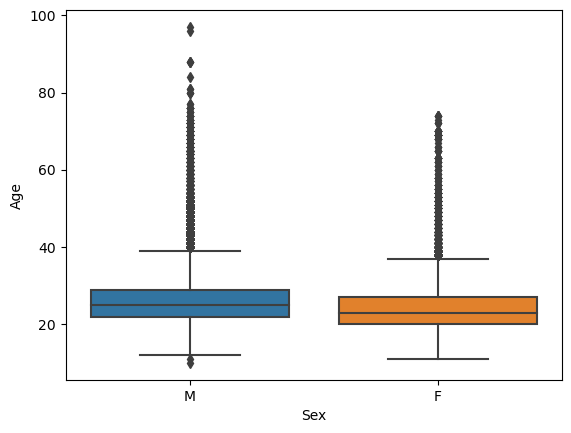

In [48]:
sns.boxplot(data=olympics,x='Sex',y='Age')

33. Look at the distributions of Age for different Sex using violin plots

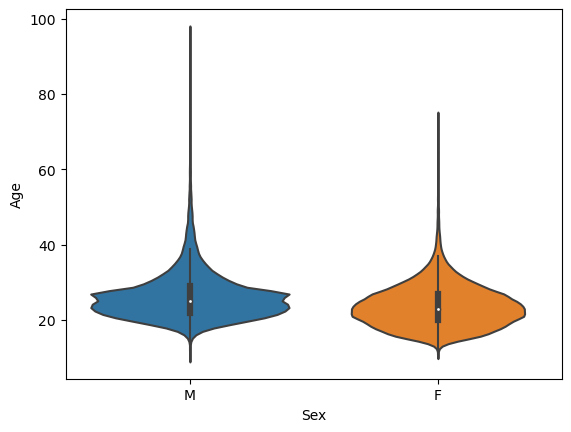

In [49]:
sns.violinplot(data=olympics,x='Sex',y='Age')

34. Look at the distributions of Age for different Sex using boxplots, with different colors of plots for different Season

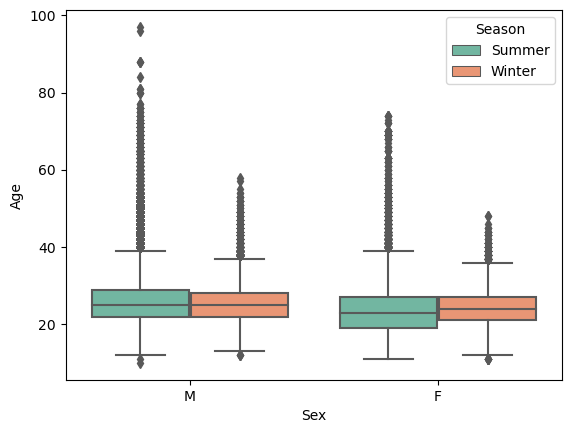

In [53]:
sns.boxplot(data=olympics,x='Sex',y='Age',hue='Season',palette='Set2')
plt.legend(title='Season', loc='upper right')

35. Use count plots to look at the changes of number of athlete-events across Year, for different Sex by colors, and different Season on separate plots

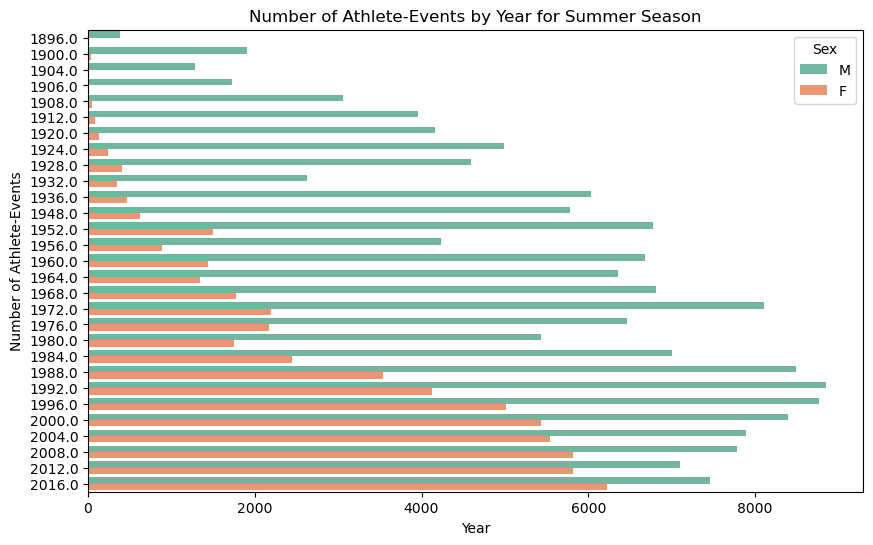

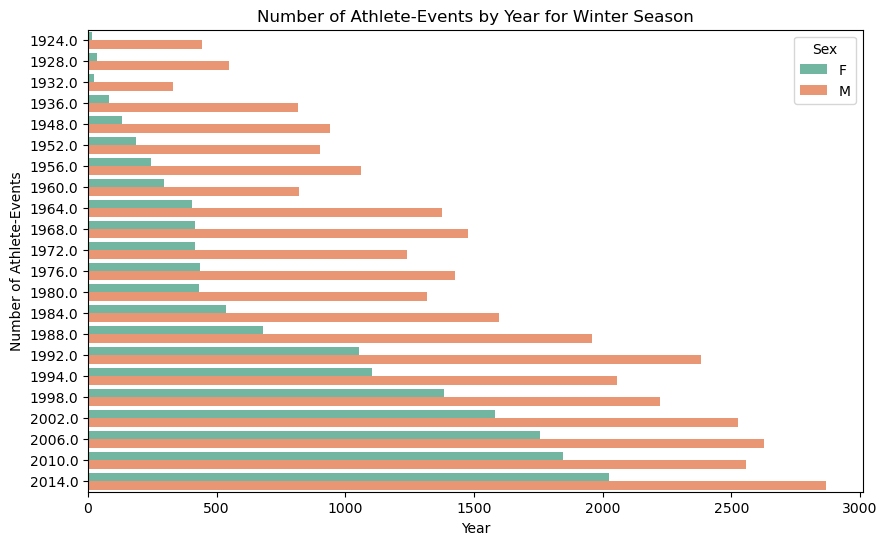

In [68]:
# Filter the data by Season
seasons = olympics['Season'].unique()

# Create count plots for each season
for season in seasons:
    plt.figure(figsize=(10, 6))
    
    # Filter data by season
    data_season = olympics[olympics['Season'] == season]
    
    # Create a count plot
    sns.countplot(data=data_season, y='Year', hue='Sex',palette = "Set2"


)
    
    # Set plot labels and title
    plt.xlabel("Year")
    plt.ylabel("Number of Athlete-Events")
    plt.title(f"Number of Athlete-Events by Year for {season} Season")
    
    # Show the plot
    plt.legend(title='Sex', loc='upper right')
    plt.show()